In [71]:
#python3
#libraries required are opencv, numpy
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import math


In [126]:
#PSNR - Peak Signal to Noise Ratio, a measure of the difference between two images. Higher the value more similar are the two images 
def PSNR(img1, img2):
    mse = np.mean( (img1 - img2) ** 2.0 )      #MSE
    if mse == 0:
        return -1                              #psnr is infinite and both the image are same
    return 20*math.log10(255.0/mse**0.5)      #formula for PSNR


def normalize(img):           #img - np.uint8 image array
    tmp=np.add(img,-1*img.min())
    tmp1=np.divide(tmp,tmp.max())
    tmp2=np.multiply(tmp1,255)
    tmp3=np.uint8(tmp2)
    return tmp3


#Reverse Filtering algorithm

def Reverse(J,N): 
    X=np.float32(J)
    for i in range(N):
        #J_=f(X)
        #residue=np.subtract(J,J_)
        #X=np.add(np.dot(X,0.5),np.multiply(residue,0.5))
        X = X+J-cv.bilateralFilter(X,35,75,75)
        #X = X+J-cv.GaussianBlur(X,(21,21),2)
        #X=np.uint8(X)
    final_img=normalize(X)
    return final_img


In [127]:

#######################main.py########################

im=cv.imread('bird.png')
#_J=cv.GaussianBlur(im,(7,7),3)
J=cv.bilateralFilter(im,35,75,75)
tmp=[]
tmp_PSNR=[]
for i in range(3,20):
    X=Reverse(J,i)
    #plt.figure()
    #plt.imshow(np.uint8(X))
    tmp.append(X)
    tmp_PSNR.append(PSNR(im,X))

k=tmp_PSNR.index(max(tmp_PSNR))
X_=tmp[k]
#X_=Reverse(J,5)
#X_=np.uint8(X_)
#cv.imwrite('Reverse_bird.jpg',X_)

#cv.imwrite('Filtered.jpg',J)
#cv.imwrite('BLurred_bird.jpg',J)

print(PSNR(im,X_))
print(PSNR(im,J))

5.205942947761498
3.5380810455736866


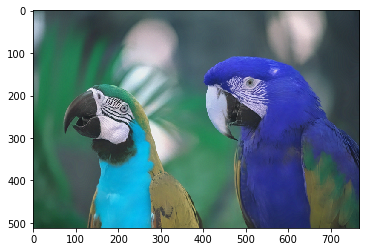

In [128]:
plt.imshow(X_) #output image corrected by the reverse filtering algorithm

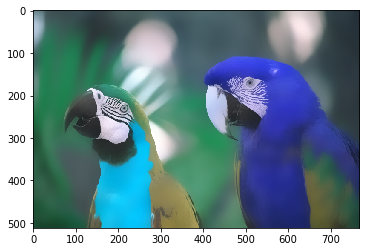

In [129]:
plt.imshow(J)  #input blurred image blurred by inbuilt bilateral filter

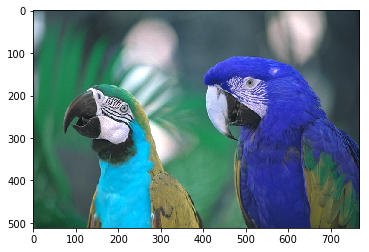

In [131]:
plt.imshow(im) #original image which was later blurred using the bilateral filter

In [138]:
cv.imwrite("Results/bird_blurred.jpg",J)

True

In [139]:
cv.imwrite("Results/bird_reversed.jpg",X_)

True

In [132]:
np.mean((im-X_)**2)

41.75691392686632

In [133]:
np.mean((im-J)**2)

29.144774542914497

In [76]:
cv.imwrite('Result_Bird.jpg',X_)
cv.imwrite('Blurred_input_bird.jpg',J)


True

In [77]:

#######################main.py########################

im=cv.imread('bird.png')
#im=cv.resize(im,(500,500,))
_J=cv.GaussianBlur(im,(21,21),2)

#J=cv.bilateralFilter(im,40,75,75)
tmp=[]
tmp_PSNR=[]

'''for i in range(3,20):
    X=Reverse(J,i)
    tmp.append(X)
    tmp_PSNR.append(PSNR(im,X))

k=tmp_PSNR.index(max(tmp_PSNR))
X_=tmp[k]'''

#cv2.medianBlur(img,5)
X_=Reverse(_J,8)
X_=np.uint8(X_)
#cv.imwrite('Reverse_bird.jpg',X_)

#cv.imwrite('Filtered.jpg',J)
#cv.imwrite('BLurred_bird.jpg',J)

print(PSNR(im,X_))
print(PSNR(im,_J))


3.369282067788235
2.801799069122743


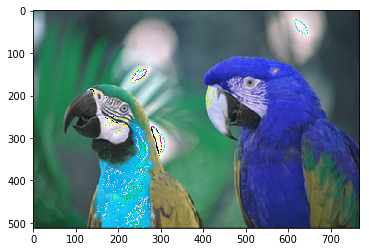

In [78]:
plt.imshow(X_)

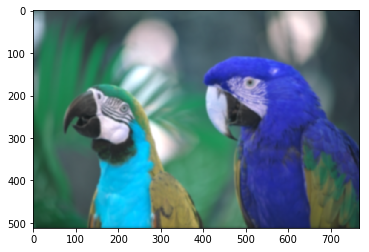

In [79]:
plt.imshow(_J)

In [81]:
X_[0][0]

array([ 90, 117, 116], dtype=uint8)

In [82]:
np.uint8(258)

2

In [107]:
x=Reverse(_J,50)

In [84]:
x[0]

array([[ 90.70798 , 117.109085, 115.70645 ],
       [ 90.02839 , 116.106926, 125.94352 ],
       [ 88.41067 , 124.458595, 123.91037 ],
       ...,
       [ 31.988205,  45.472946,  51.855667],
       [ 34.446503,  38.52819 ,  45.162777],
       [ 24.181164,  39.998646,  46.63413 ]], dtype=float32)

In [85]:
min(x)

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

In [87]:
x.min()

-9.549585

In [88]:
x.max()

279.8515

In [108]:
x_=np.add(x,-1*x.min())

In [109]:
x__=np.divide(x_,x_.max())

In [110]:
x___=np.multiply(x__,255)

In [111]:
x___=np.uint8(x___)

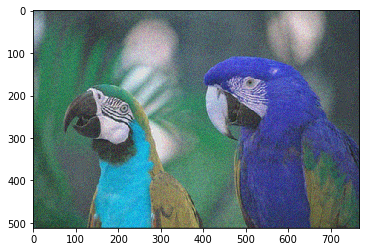

In [112]:
plt.imshow(x___)

In [114]:
PSNR(im,_J)

2.801799069122743

In [115]:
PSNR(im,x___)

2.8862476334525784